<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;


<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=5> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;


    
<div align="center"> 
<font size=6> SLM de Kopin</font>
</div>

<div align="center"> 
<font size=6> Ejemplo de uso en pylab </font>
</div>


- **Fecha**: 2023/09/01
        
- **Objetivos**: Implementación de kopin en pyLab
  
- **Descripción** 
    - Isidoro Jimenez Castillo ha desarrollado la placa, y la hemos fabricado en www.jlcpcb.com. También a desarrollado el software del microprocesador y los algoritmos de envío de imágenes desde python.



- **Autores**: 
    - Isidoro Jimenez Castillo
    - Luis Miguel Sánchez Brea 

## Cargar módulos

In [1]:
#load_ext autoreload
#autoreload 2

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from diffractio import um, degrees, mm, nm
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [3]:
from py_lab.drivers.slms.kopin import devices_ctrl

from py_lab.drivers.slms.kopin.kopin import Kopin, pixels

In [4]:
from py_lab.slm import SLM

# Cargar dispositivo

In [5]:
wavelength=632.8*nm

In [6]:
k0 = SLM(name = 'Kopin')
k0.ID_screen=0

{'CYDI_E6625C05E7143E25': <comms_cydi.SerialComms object at 0x7f6c4347e950>}


In [7]:
print(k0.resolution)
print(k0.name)

[300 225]
Kopin


In [8]:
x0, y0 = k0.Get_Diffractio_Space()
print(x0.shape, y0.shape)


(300,) (225,)


In [9]:
u0=Scalar_mask_XY(x0,y0,wavelength)

u0.forked_grating(r0=(0, 0),
                       period=400 * um,
                       l=3,
                       alpha=2,
                       kind='amplitude',
                       angle=0 * degrees)

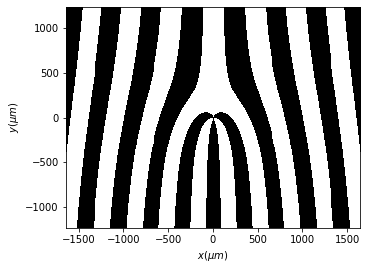

In [10]:
u0.draw()

in send


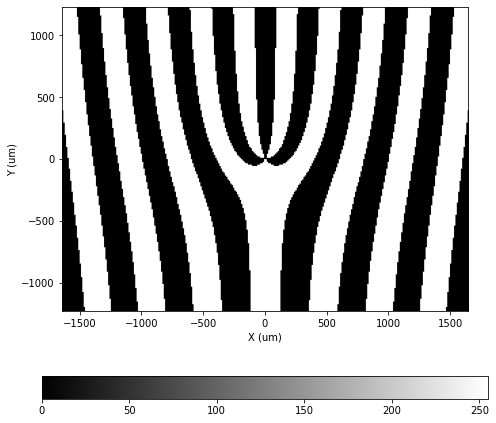

In [11]:
im2=k0.Send_Image(image=u0, kind='intensity', draw=True, return_array=True)

In [12]:
print(im2)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [26]:
plt.imshow(im2)

In [13]:
k0._object.send_image(test=1)

circle


In [6]:
k0._object.send_image(test=2)

square


In [7]:
k0._object.send_image(test=3)

chess small


In [8]:
k0._object.send_image(test=4)

chess small


In [9]:
k0._object.send_image(test=5)

square as a 


In [10]:
k0._object.send_image(duration=1, test=3)

chess small


-3.1412438540590664 3.1402611367861675
-0.4999444868305367 0.49978808251889306


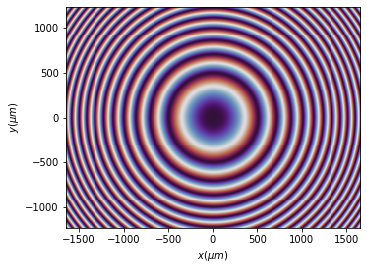

In [16]:
k0._object.mask.lens(r0=(0,0), focal=200000*mm, angle=0 * degrees)
k0._object.mask.draw('phase')
k0._object.send_image(kind='phase')

0.0 3.141592653589793
0.0 0.5
0.0 0.5


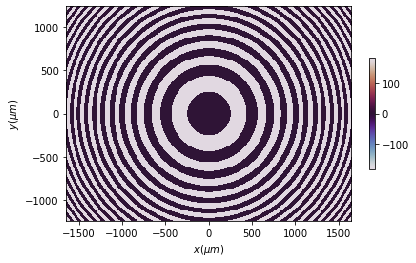

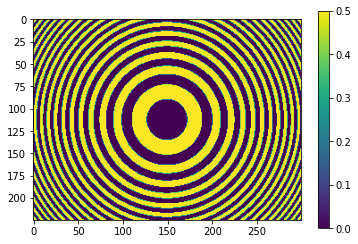

In [18]:
k0._object.mask.lens(r0=(0, 0), focal=200000 * mm, angle=0 * degrees)

k0._object.mask.binarize(kind='phase', level0=-np.pi, level1=np.pi)
k0._object.mask.draw('phase', has_colorbar='vertical')
k0._object.send_image(kind='phase', has_draw=True)

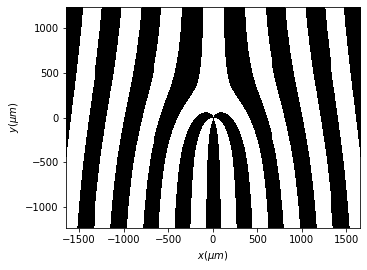

In [21]:
k0._object.mask.forked_grating(r0=(0, 0),
                       period=400 * um,
                       l=3,
                       alpha=2,
                       kind='amplitude',
                       angle=0 * degrees)
k0._object.mask.draw('intensity')
k0._object.send_image()

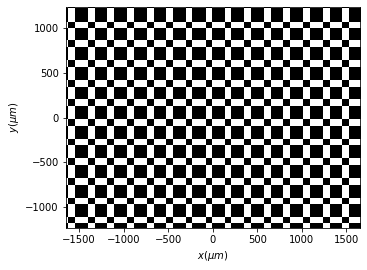

In [22]:
k0._object.mask.grating_2D_chess(r0=(0, 0),
                         period=20 * pixels,
                         fill_factor=0.66,
                         angle=0 * degrees)

k0._object.mask.draw('intensity')
k0._object.send_image()

In [9]:
# k1.close()